In [17]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
train_data = pd.read_csv('data/train.csv')
train_data.head()

,Unnamed: 0,age,on thyroxine,query on thyroxine,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,...,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,medical_info
0,0,82.0,f,f,f,f,f,f,f,f,...,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,1935-05-20 00:00:00,"{'TSH measured':'t','sex':'M','query hyperthyr..."
1,1,50.0,f,f,f,t,f,f,f,f,...,Divorced,Prof-specialty,Unmarried,White,0,0,35,United-States,67-08-03,"{'TSH measured':'t','sex':'F','query hyperthyr..."
2,2,41.0,f,f,f,f,f,f,f,f,...,Widowed,Farming-fishing,Unmarried,White,0,0,50,United-States,1976-05-02,"{'TSH measured':'f','sex':'F','query hyperthyr..."
3,3,73.0,f,f,f,f,f,f,f,f,...,Married-civ-spouse,Adm-clerical,Wife,White,0,0,25,United-States,44-10-08,"{'TSH measured':'t','sex':'F','query hyperthyr..."
4,4,64.0,f,f,f,f,f,f,f,f,...,Married-civ-spouse,Sales,Husband,White,0,0,60,United-States,1953-05-01,"{'TSH measured':'t','sex':'M','query hyperthyr..."


In [ ]:
train_data[train_data.duplicated(subset='Unnamed: 0')].size

In [19]:
train_data = train_data.set_index('Unnamed: 0')
train_data.columns.names = ['id']
train_data.index.names = ['id']
train_data.head()

id,age,on thyroxine,query on thyroxine,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,...,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,medical_info
id,,,,,,,,,,,,,,,,,,,,,
0,82.0,f,f,f,f,f,f,f,f,f,...,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,1935-05-20 00:00:00,"{'TSH measured':'t','sex':'M','query hyperthyr..."
1,50.0,f,f,f,t,f,f,f,f,f,...,Divorced,Prof-specialty,Unmarried,White,0,0,35,United-States,67-08-03,"{'TSH measured':'t','sex':'F','query hyperthyr..."
2,41.0,f,f,f,f,f,f,f,f,f,...,Widowed,Farming-fishing,Unmarried,White,0,0,50,United-States,1976-05-02,"{'TSH measured':'f','sex':'F','query hyperthyr..."
3,73.0,f,f,f,f,f,f,f,f,f,...,Married-civ-spouse,Adm-clerical,Wife,White,0,0,25,United-States,44-10-08,"{'TSH measured':'t','sex':'F','query hyperthyr..."
4,64.0,f,f,f,f,f,f,f,f,f,...,Married-civ-spouse,Sales,Husband,White,0,0,60,United-States,1953-05-01,"{'TSH measured':'t','sex':'M','query hyperthyr..."


In [306]:
train_data.shape

(2800, 34)

In [307]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 0 to 2799
Data columns (total 34 columns):
age                   2519 non-null float64
on thyroxine          2800 non-null object
query on thyroxine    2800 non-null object
pregnant              2800 non-null object
thyroid surgery       2800 non-null object
I131 treatment        2800 non-null object
lithium               2800 non-null object
goitre                2800 non-null object
tumor                 2800 non-null object
hypopituitary         2800 non-null object
TSH                   2516 non-null float64
T3 measured           2800 non-null object
T3                    2215 non-null float64
TT4                   2451 non-null object
T4U                   2503 non-null float64
FTI measured          2800 non-null object
TBG measured          2800 non-null object
TBG                   2800 non-null object
referral source       2800 non-null object
class                 2800 non-null object
workclass             2800 no

In [309]:
train_data.describe(include=['O'])

id,on thyroxine,query on thyroxine,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,T3 measured,...,class,workclass,education,marital-status,occupation,relationship,race,native-country,date_of_birth,medical_info
count,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,...,2800,2800,2800,2800,2800,2800,2800,2800,2799,2800
unique,6,2,2,2,2,2,2,2,2,2,...,2800,14,16,7,26,6,5,38,2721,871
top,f,f,f,f,f,f,f,f,f,t,...,negative.|3050,Private,HS-grad,Never-married,Adm-clerical,Not-in-family,White,United-States,1953-02-28,"{'TSH measured':'f','sex':'F','query hyperthyr..."
freq,2223,2760,2759,2761,2752,2786,2775,2729,2799,2215,...,1,1774,879,1118,449,899,2318,2493,3,104


In [267]:
for column in train_data.columns[train_data.dtypes == np.object]:
    if train_data[column].unique().size < 50:
        print(column, ':')
        for val in train_data[column].unique():
            print ('   |' + val)
        print()

on thyroxine :
   |f
   |F
   |FALSE
   |t
   |TRUE
   |T

query on thyroxine :
   |f
   |t

pregnant :
   |f
   |t

thyroid surgery :
   |f
   |t

I131 treatment :
   |f
   |t

lithium :
   |f
   |t

goitre :
   |f
   |t

tumor :
   |f
   |t

hypopituitary :
   |f
   |t

T3 measured :
   |t
   |f

FTI measured :
   |t
   |f

TBG measured :
   |f

TBG :
   |?

referral source :
   |SVI
   |other
   |SVHC
   |STMW
   |SVHD

workclass :
   | Local-gov
   | Self-emp-not-inc
   |private
   | Self-emp-inc
   | Private
   | ?
   | State-gov
   |federal-gov
   |local-gov
   | Federal-gov
   |self-emp-not-inc
   |?
   |self-emp-inc
   |state-gov

education :
   | Assoc-voc
   | Bachelors
   | Some-college
   | HS-grad
   | 11th
   | Assoc-acdm
   | 12th
   | 10th
   | Masters
   | 9th
   | 7th-8th
   | Preschool
   | Prof-school
   | 1st-4th
   | Doctorate
   | 5th-6th

marital-status :
   | Married-civ-spouse
   | Divorced
   | Widowed
   | Never-married
   | Separated
   | Married-spouse-abs

In [268]:
def diffcount(str1, str2):
    return sum(1 for a, b in zip(str1, str2) if a != b)


In [310]:
train_data['medical_info'][0]

"{'TSH measured':'t','sex':'M','query hyperthyroid':'f','TT4 measured':'t','on antithyroid medication':'f','FTI':'88','sick':'f','T4U measured':'t','psych':'f','query hypothyroid':'f'}"

In [21]:
train_data.describe()

id,age,TSH,T3,T4U,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,2519.000000,2516.000000,2215.000000,2503.000000,2.800000e+03,2800.000000,2800.000000,2800.000000,2800.000000
mean,51.793569,4.672150,2.024966,0.997912,1.859808e+05,4.150714,789.960714,75.960357,38.336429
std,20.541137,21.449453,0.824600,0.194390,1.009371e+05,327.452340,5813.819092,374.218100,11.877622
min,1.000000,0.005000,0.050000,0.310000,1.939500e+04,-1600.000000,0.000000,0.000000,1.000000
25%,36.000000,0.440000,1.600000,0.880000,1.185510e+05,9.000000,0.000000,0.000000,35.000000
50%,54.000000,1.400000,2.000000,0.980000,1.772160e+05,10.000000,0.000000,0.000000,40.000000
75%,67.000000,2.600000,2.400000,1.080000,2.276065e+05,13.000000,0.000000,0.000000,40.000000
max,455.000000,478.000000,10.600000,2.120000,1.097453e+06,1500.000000,99999.000000,3683.000000,99.000000


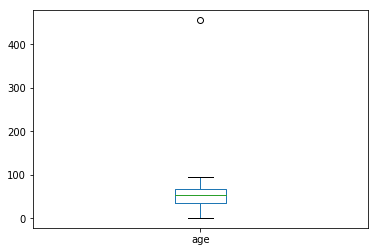

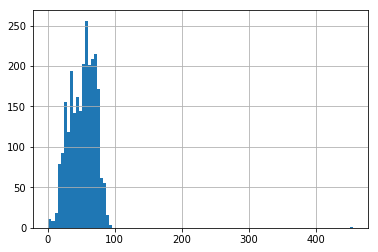

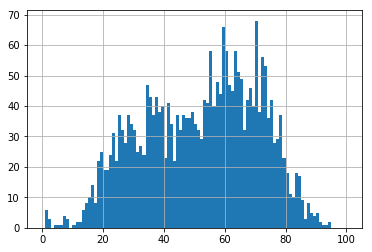

In [84]:
train_data['age'].plot.box()
plt.figure();
train_data['age'].hist(bins=100)
plt.figure();
train_data['age'].hist(bins=100, range=(0,100))

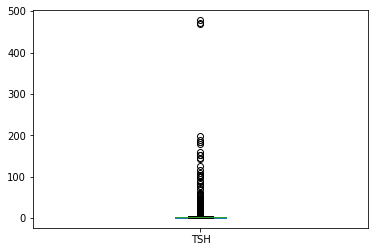

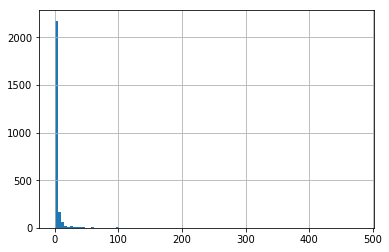

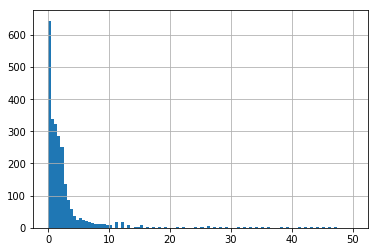

In [92]:
train_data['TSH'].plot.box()
plt.figure();
train_data['TSH'].hist(bins=100)
plt.figure();
train_data['TSH'].hist(bins=100, range=(0, 50.0))

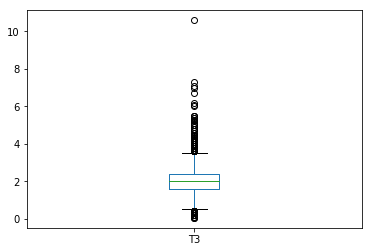

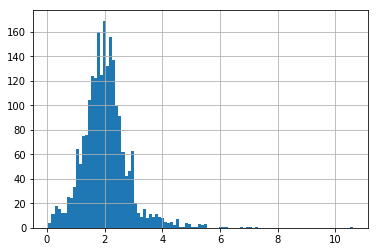

In [94]:
train_data['T3'].plot.box()
plt.figure();
train_data['T3'].hist(bins=100)
plt.figure();

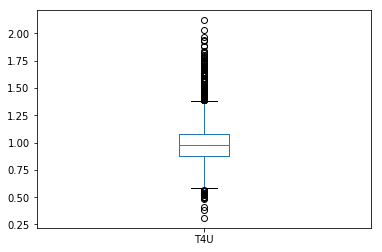

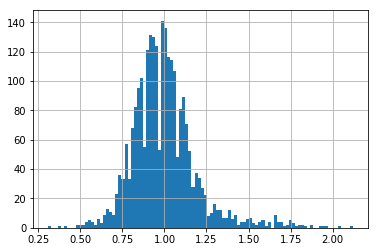

In [93]:
train_data['T4U'].plot.box()
plt.figure();
train_data['T4U'].hist(bins=100)
plt.figure();

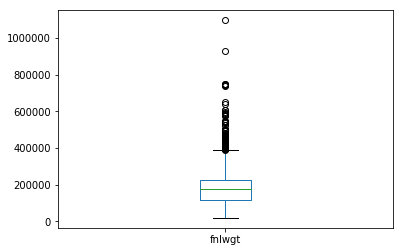

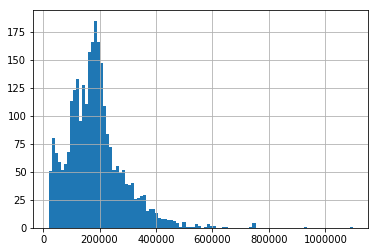

In [95]:
train_data['fnlwgt'].plot.box()
plt.figure();
train_data['fnlwgt'].hist(bins=100)
plt.figure();

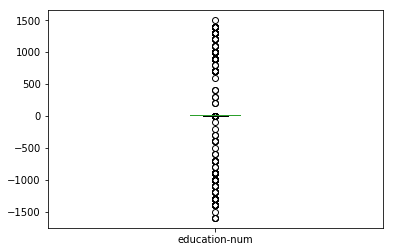

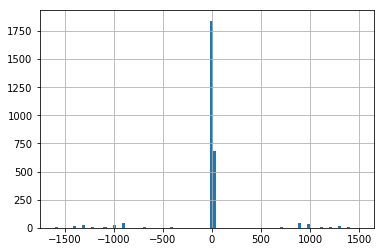

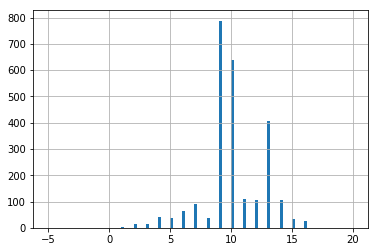

In [98]:
train_data['education-num'].plot.box()
plt.figure();
train_data['education-num'].hist(bins=100)
plt.figure();
train_data['education-num'].hist(bins=100, range=(-5, 20))

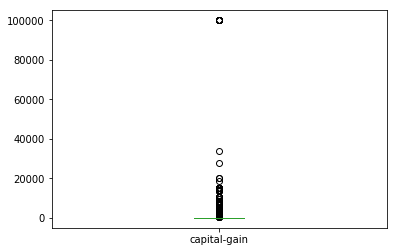

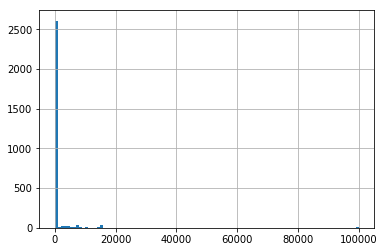

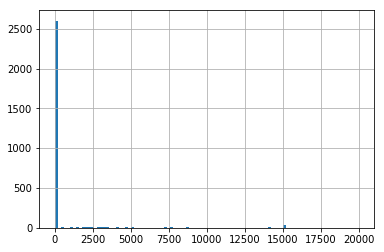

In [103]:
train_data['capital-gain'].plot.box()
plt.figure();
train_data['capital-gain'].hist(bins=100)
plt.figure();
train_data['capital-gain'].hist(bins=100, range=(0, 20000))


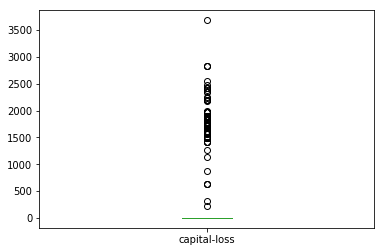

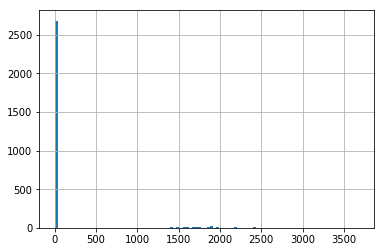

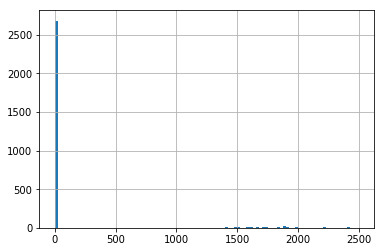

In [106]:
train_data['capital-loss'].plot.box()
plt.figure();
train_data['capital-loss'].hist(bins=100)
plt.figure();
train_data['capital-loss'].hist(bins=100, range=(0, 2500))

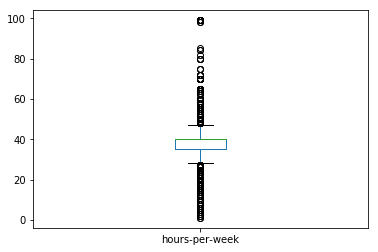

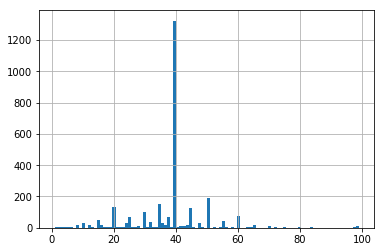

In [107]:
train_data['hours-per-week'].plot.box()
plt.figure();
train_data['hours-per-week'].hist(bins=100)